In [1]:
from preprocess_all_data import discover_all_recordings
from classes.data import Data
from classes.annotation import Annotation
import numpy as np

In [2]:
DATA_DIRECTORY = "/home/swolf/asim_shared/raw_data/ds005873-1.1.0"
recs = discover_all_recordings(DATA_DIRECTORY)

Found 125 subjects
  Found: sub-001 run-03
  Found: sub-001 run-07
  Found: sub-001 run-01
  Found: sub-001 run-05
  Found: sub-001 run-04
  Found: sub-001 run-06
  Found: sub-001 run-09
  Found: sub-001 run-02
  Found: sub-001 run-08
  Found: sub-012 run-09
  Found: sub-012 run-06
  Found: sub-012 run-04
  Found: sub-012 run-01
  Found: sub-012 run-08
  Found: sub-012 run-07
  Found: sub-012 run-05
  Found: sub-012 run-03
  Found: sub-012 run-10
  Found: sub-012 run-02
  Found: sub-071 run-35
  Found: sub-071 run-28
  Found: sub-071 run-22
  Found: sub-071 run-29
  Found: sub-071 run-38
  Found: sub-071 run-25
  Found: sub-071 run-14
  Found: sub-071 run-31
  Found: sub-071 run-26
  Found: sub-071 run-24
  Found: sub-071 run-10
  Found: sub-071 run-21
  Found: sub-071 run-08
  Found: sub-071 run-09
  Found: sub-071 run-16
  Found: sub-071 run-05
  Found: sub-071 run-34
  Found: sub-071 run-36
  Found: sub-071 run-20
  Found: sub-071 run-11
  Found: sub-071 run-33
  Found: sub-071 run-

In [3]:
recs[:3]

[('sub-001', 'run-03'), ('sub-001', 'run-07'), ('sub-001', 'run-01')]

In [4]:
annotations = Annotation.loadAnnotation(DATA_DIRECTORY, recs[2])


In [5]:
annotations.types

[]

In [6]:
annotations.events

[]

In [8]:
seizure_lengths = []
seizure_types = []
for rec in recs:
    annotations = Annotation.loadAnnotation(DATA_DIRECTORY, rec)
    if len(annotations.events)>1:
        print(rec)
        break
        seizure_types.extend(annotations.types)
        for seizure in annotations.events:
            seizure_lengths.append(seizure[1]-seizure[0])
seizure_types = list(set(seizure_types))

('sub-012', 'run-03')


In [34]:
print(seizure_types)

['sz_uo_nm', 'sz_foc_ua_m_tonic', 'sz_foc_ia_m_tonic', 'sz_foc_ia_m_clonic', 'sz_foc_ua_m_hyperkinetic', 'sz_foc_a_nm_behavior', 'sz_foc_ia_um', 'sz_foc_ia_nm', 'sz_foc_ia_m_automatisms', 'sz_foc_ia_m_hyperkinetic', 'sz_foc_a_um', 'sz_foc_a_m_hyperkinetic', 'sz_foc_ia_nm_behavior', 'sz_foc_ua_m', 'sz_foc_ua_m_automatisms', 'sz_foc_ia', 'sz_foc_ua_nm', 'sz_foc_f2b', 'sz_foc_ua_nm_behavior', 'sz_foc_a_nm', 'sz_foc_a_m_automatisms', 'sz_foc_ua_um']


In [ ]:
arr = np.array(seizure_lengths)
print(f"{'Count seizures':40}: {len(seizure_lengths)}")
print(f"{'Mean (average value)':40}: {np.mean(arr):.5f}")
print(f"{'Median (middle value)':40}: {np.median(arr):.5f}")
print(f"{'25th percentile (lower quartile)':40}: {np.percentile(arr, 25):.5f}")
print(f"{'50th percentile (same as median)':40}: {np.percentile(arr, 50):.5f}")
print(f"{'75th percentile (upper quartile)':40}: {np.percentile(arr, 75):.5f}")
print(f"{'90th percentile (high value threshold)':40}: {np.percentile(arr, 90):.5f}")
print(f"{'95th percentile (extremely high value)':40}: {np.percentile(arr, 95):.5f}")
print(f"{'Standard deviation (spread of values)':40}: {np.std(arr, ddof=1):.5f}")
print(f"{'Minimum (smallest value)':40}: {np.min(arr):.5f}")
print(f"{'Maximum (largest value)':40}: {np.max(arr):.5f}")
print(f"{'Range (max - min)':40}: {np.ptp(arr):.5f}")

['sz_uo_nm', 'sz_foc_ua_m_tonic', 'sz_foc_ia_m_tonic', 'sz_foc_ia_m_clonic', 'sz_foc_ua_m_hyperkinetic', 'sz_foc_a_nm_behavior', 'sz_foc_ia_um', 'sz_foc_ia_nm', 'sz_foc_ia_m_automatisms', 'sz_foc_ia_m_hyperkinetic', 'sz_foc_a_um', 'sz_foc_a_m_hyperkinetic', 'sz_foc_ia_nm_behavior', 'sz_foc_ua_m', 'sz_foc_ua_m_automatisms', 'sz_foc_ia', 'sz_foc_ua_nm', 'sz_foc_f2b', 'sz_foc_ua_nm_behavior', 'sz_foc_a_nm', 'sz_foc_a_m_automatisms', 'sz_foc_ua_um']
Count seizures                          : 856
Mean (average value)                    : 58.60397
Median (middle value)                   : 33.50000
25th percentile (lower quartile)        : 14.00000
50th percentile (same as median)        : 33.50000
75th percentile (upper quartile)        : 84.00000
90th percentile (high value threshold)  : 123.50000
95th percentile (extremely high value)  : 158.25000
Standard deviation (spread of values)   : 73.77924
Minimum (smallest value)                : 2.00000
Maximum (largest value)                 : 96

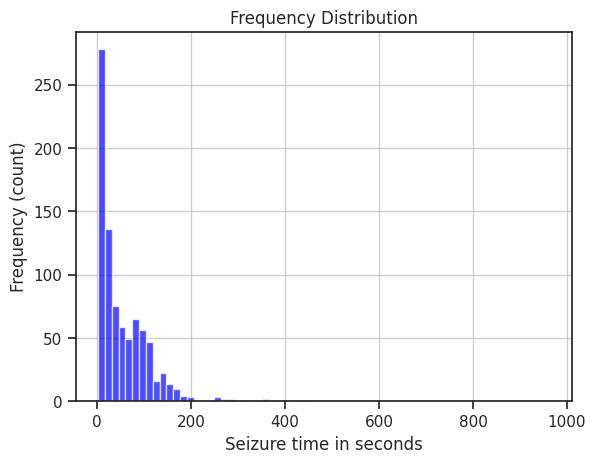

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_distribution(arr: np.ndarray, title:str="Frequency Distribution") -> plt.Figure:
    """
    Plots the frequency distribution (histogram) of the given numpy array.

    Parameters:
    arr (np.ndarray): Array of numerical values to plot the frequency distribution for.

    Returns:
    plt.Figure: The matplotlib Figure object containing the histogram plot.
    """
    fig, ax = plt.subplots()
    ax.hist(arr, bins='auto', color='blue', alpha=0.7)
    ax.set_xlabel('Seizure time in seconds')
    ax.set_ylabel('Frequency (count)')
    ax.set_title(title)
    plt.grid(True)
    return fig

# Example usage:
fig =plot_frequency_distribution(arr)

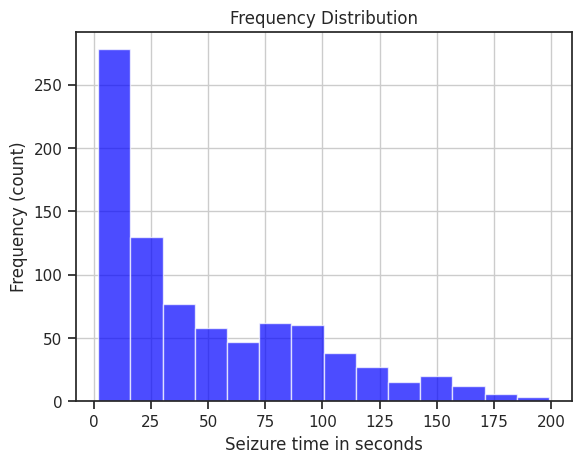

In [61]:
fig =plot_frequency_distribution(arr[(arr >= 0) & (arr <= 200)])

## Now check for diff seizure types:

In [ ]:
from typing import Dict, List
"""
Collect seizure durations grouped by seizure type.

Args:
    recs (List): List of recordings.
    data_directory (str): Directory path for loading annotations.

Returns:
    Dict[str, List[float]]: Dictionary mapping seizure types to list of seizure durations.
"""
seizure_dict: Dict[str, List[float]] = {}

for rec in recs:
    annotations = Annotation.loadAnnotation(DATA_DIRECTORY, rec)
    if len(annotations.events) > 0:
        for seizure_type, seizure_event in zip(annotations.types, annotations.events):
            duration = seizure_event[1] - seizure_event[0]
            if seizure_type not in seizure_dict:
                seizure_dict[seizure_type] = []
            seizure_dict[seizure_type].append(duration)

In [37]:
from typing import Dict, List, Tuple

def sort_seizure_dict_by_count(seizure_dict: Dict[str, List[float]]) -> Dict[str, List[float]]:
    """
    Sort seizure dictionary by the number of seizure durations (data points) descending.

    Args:
        seizure_dict (Dict[str, List[float]]): Dictionary mapping seizure types to list of durations.

    Returns:
        Dict[str, List[float]]: New dictionary sorted by descending count of durations.
    """
    # Sort items by length of duration list, descending
    sorted_items: List[Tuple[str, List[float]]] = sorted(
        seizure_dict.items(), 
        key=lambda item: len(item[1]), 
        reverse=True
    )
    # Return as dict
    return dict(sorted_items)

In [52]:
def print_seizure_stats_short(seizure_dict: Dict[str, List[float]]) -> None:
    """
    Print mean, median and standard deviation of seizure durations per seizure type.

    Args:
        seizure_dict (Dict[str, List[float]]): Dictionary of seizure types and their durations.
    """
    for seizure_type, durations in seizure_dict.items():
        mean_val = np.mean(durations)
        median_val = np.median(durations)
        std_val = np.std(durations)
        print(f"Seizure Type: {seizure_type}")
        print(f"  {'Count seizures':25}: {len(durations)}")
        print(f"  {'Mean duration':25}: {mean_val:.3f}")
        print(f"  {'Median duration':25}: {median_val:.3f}")
        print(f"  {'Standard deviation':25}: {std_val:.3f}")
        print()

In [42]:
def print_seizure_stats(seizure_dict: Dict[str, List[float]]) -> None:
    """
    Print detailed statistics of seizure durations per seizure type.

    Args:
        seizure_dict (Dict[str, List[float]]): Dictionary of seizure types and their durations.
    """
    for seizure_type, durations in seizure_dict.items():
        arr = np.array(durations)
        print(f"Statistics for seizure type: {seizure_type}")
        print(f"{'Count seizures':40}: {len(arr)}")
        print(f"{'Mean (average value)':40}: {np.mean(arr):.5f}")
        print(f"{'Median (middle value)':40}: {np.median(arr):.5f}")
        print(f"{'25th percentile (lower quartile)':40}: {np.percentile(arr, 25):.5f}")
        print(f"{'50th percentile (same as median)':40}: {np.percentile(arr, 50):.5f}")
        print(f"{'75th percentile (upper quartile)':40}: {np.percentile(arr, 75):.5f}")
        print(f"{'90th percentile (high value threshold)':40}: {np.percentile(arr, 90):.5f}")
        print(f"{'95th percentile (extremely high value)':40}: {np.percentile(arr, 95):.5f}")
        print(f"{'Standard deviation (spread of values)':40}: {np.std(arr, ddof=1):.5f}")
        print(f"{'Minimum (smallest value)':40}: {np.min(arr):.5f}")
        print(f"{'Maximum (largest value)':40}: {np.max(arr):.5f}")
        print(f"{'Range (max - min)':40}: {np.ptp(arr):.5f}")
        print()
seizure_dict = sort_seizure_dict_by_count(seizure_dict=seizure_dict)

In [53]:
print_seizure_stats_short(seizure_dict)

Seizure Type: sz_foc_ia_nm
  Count seizures           : 160
  Mean duration            : 32.388
  Median duration          : 20.000
  Standard deviation       : 41.326

Seizure Type: sz_foc_a_m_hyperkinetic
  Count seizures           : 158
  Mean duration            : 40.703
  Median duration          : 13.000
  Standard deviation       : 44.031

Seizure Type: sz_foc_ia_m_hyperkinetic
  Count seizures           : 98
  Mean duration            : 70.480
  Median duration          : 51.000
  Standard deviation       : 63.959

Seizure Type: sz_foc_a_nm
  Count seizures           : 66
  Mean duration            : 53.091
  Median duration          : 48.000
  Standard deviation       : 38.443

Seizure Type: sz_foc_ia_m_automatisms
  Count seizures           : 61
  Mean duration            : 88.393
  Median duration          : 70.000
  Standard deviation       : 72.993

Seizure Type: sz_foc_f2b
  Count seizures           : 51
  Mean duration            : 144.804
  Median duration          : 10

In [54]:
print_seizure_stats(seizure_dict)

Statistics for seizure type: sz_foc_ia_nm
Count seizures                          : 160
Mean (average value)                    : 32.38750
Median (middle value)                   : 20.00000
25th percentile (lower quartile)        : 13.00000
50th percentile (same as median)        : 20.00000
75th percentile (upper quartile)        : 35.25000
90th percentile (high value threshold)  : 74.20000
95th percentile (extremely high value)  : 85.15000
Standard deviation (spread of values)   : 41.45604
Minimum (smallest value)                : 2.00000
Maximum (largest value)                 : 442.00000
Range (max - min)                       : 440.00000

Statistics for seizure type: sz_foc_a_m_hyperkinetic
Count seizures                          : 158
Mean (average value)                    : 40.70253
Median (middle value)                   : 13.00000
25th percentile (lower quartile)        : 10.00000
50th percentile (same as median)        : 13.00000
75th percentile (upper quartile)        : 87.7

/home/jhagenbe_sw/ASIM/ecg-seizure-detection/ASIM_v1/lib/python3.10/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jhagenbe_sw/ASIM/ecg-seizure-detection/ASIM_v1/lib/python3.10/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_2181395/3834677624.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


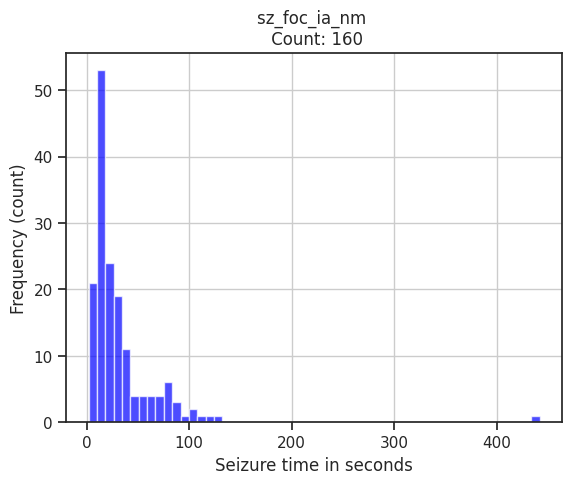

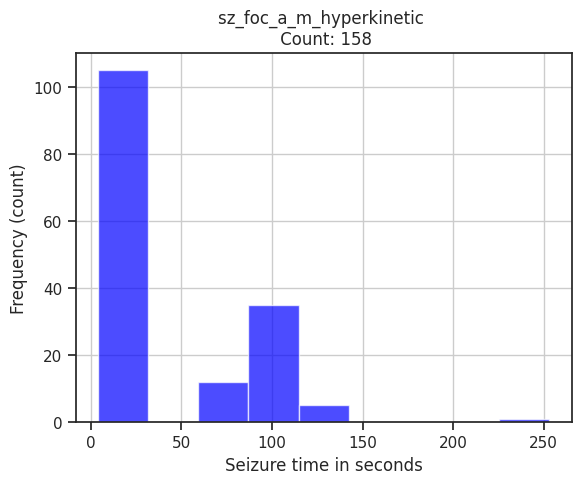

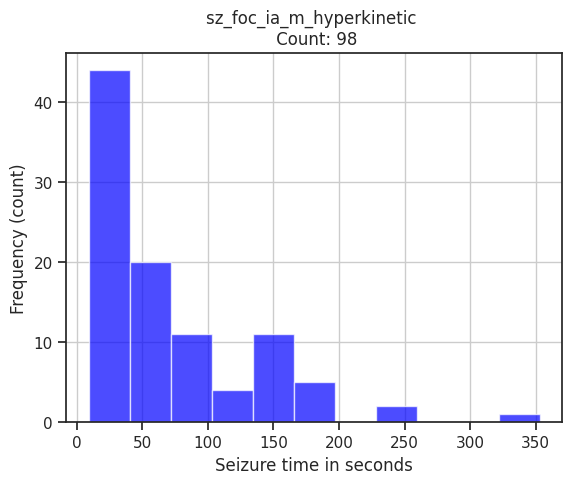

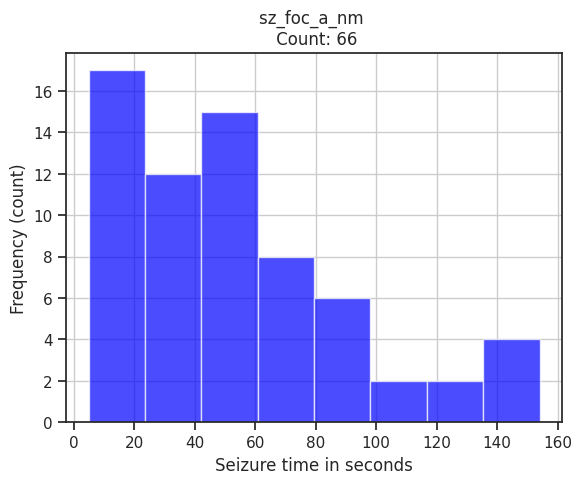

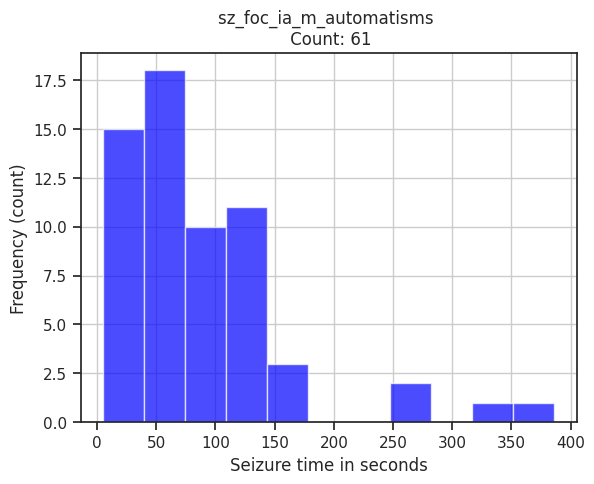

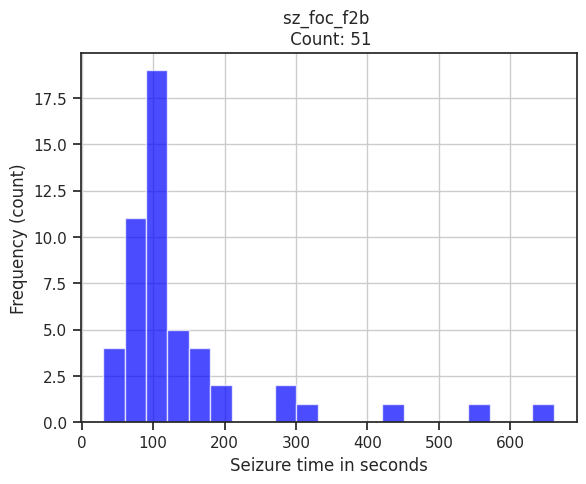

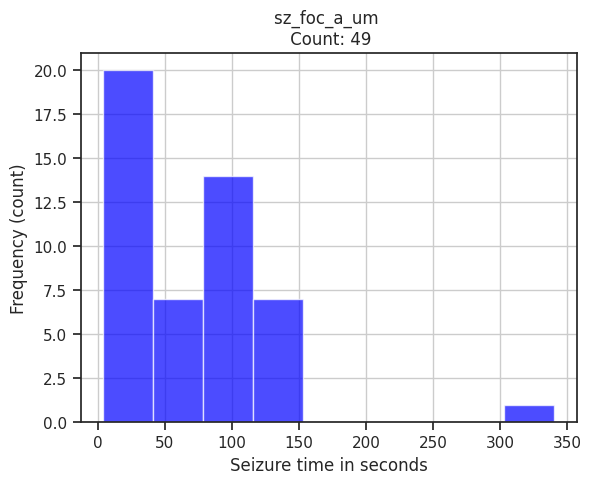

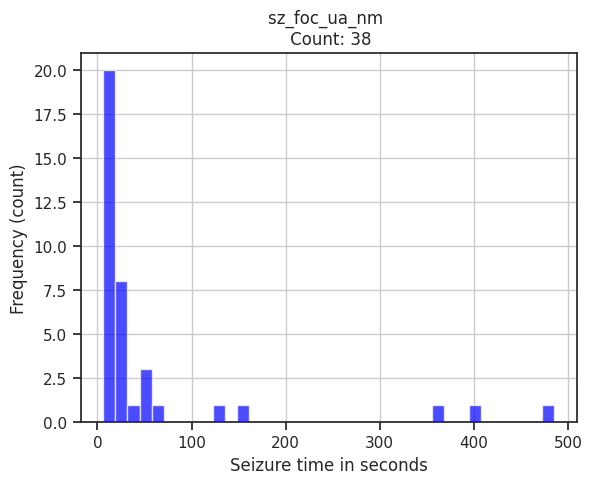

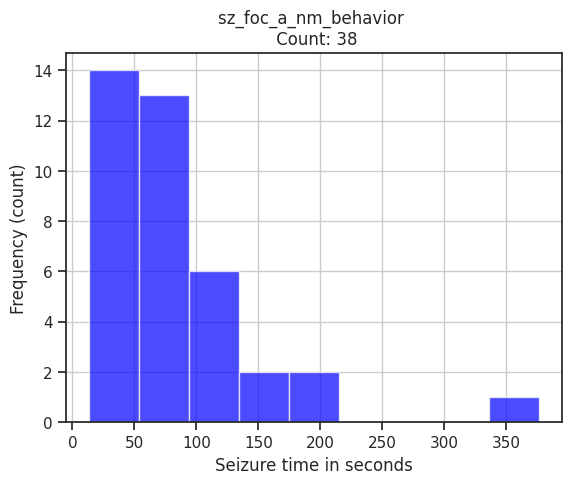

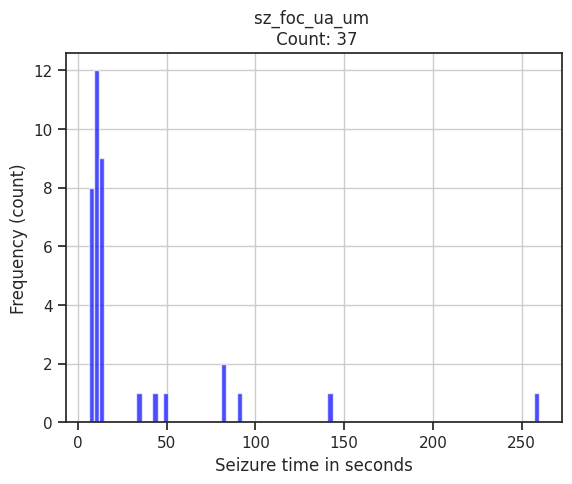

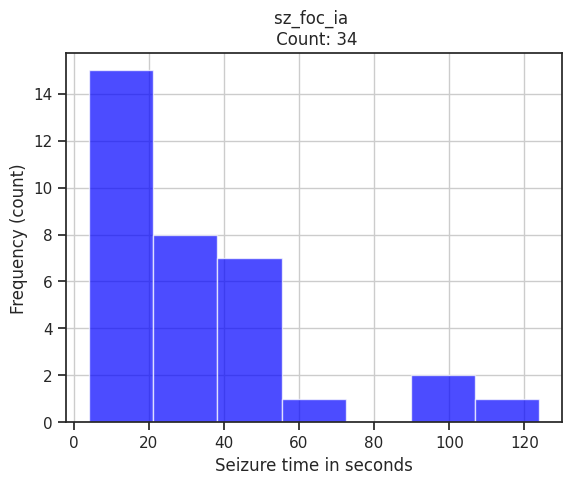

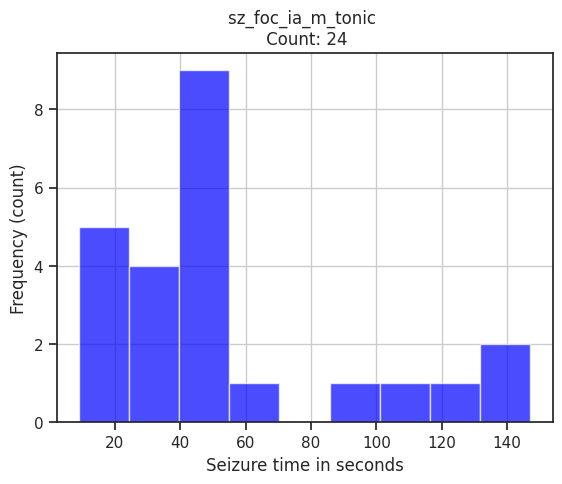

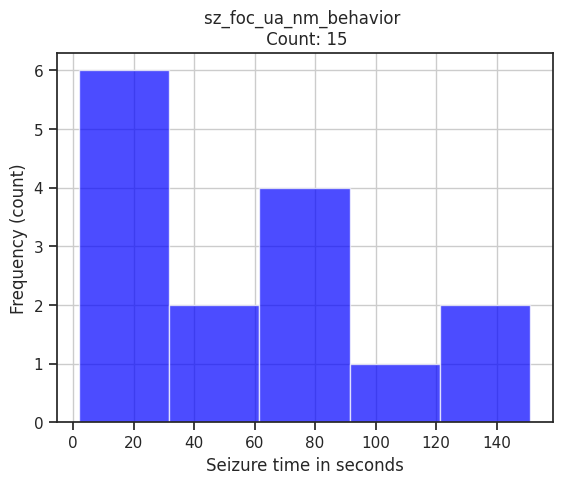

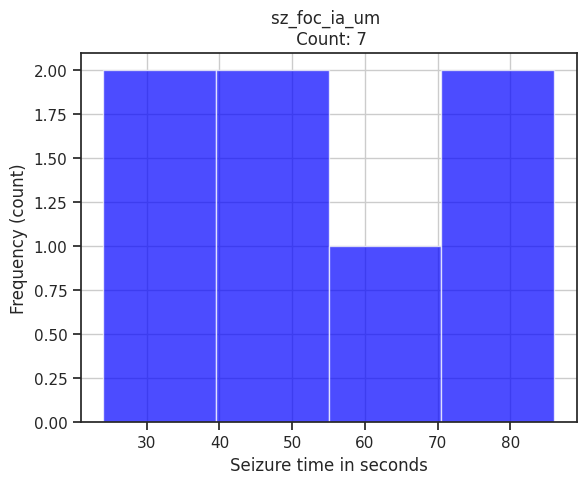

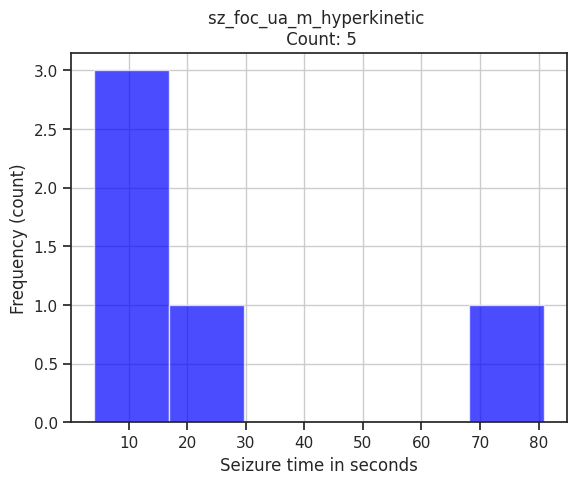

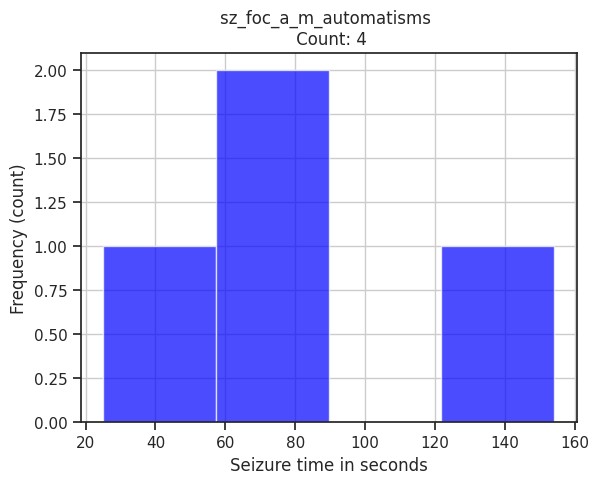

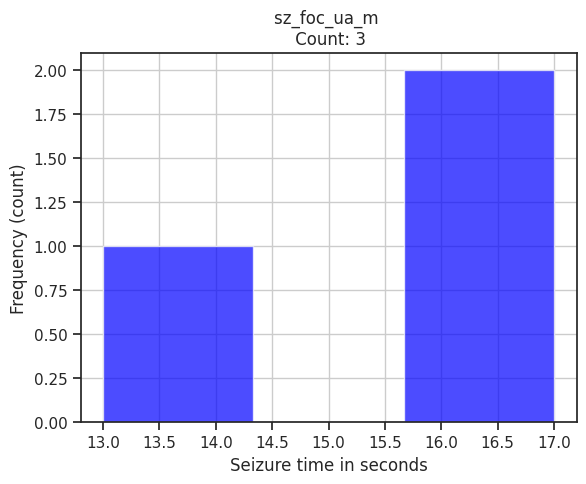

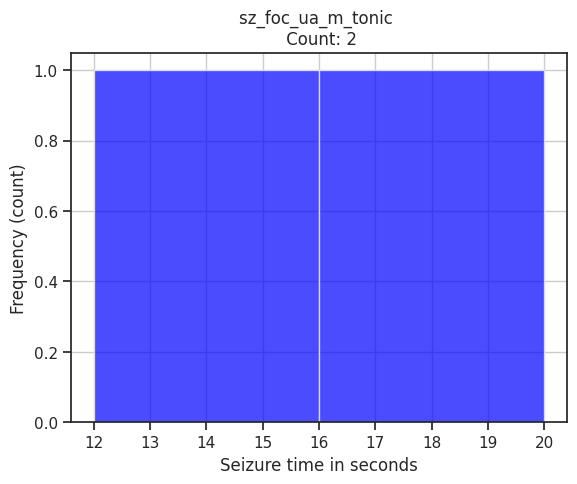

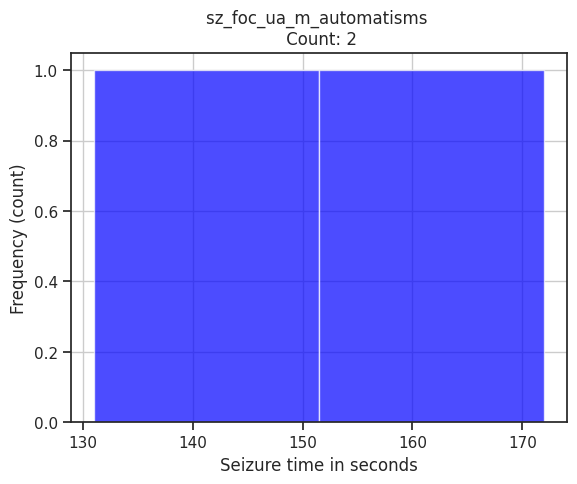

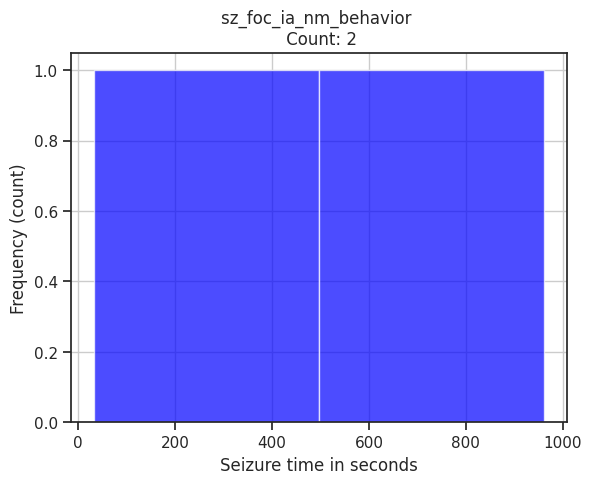

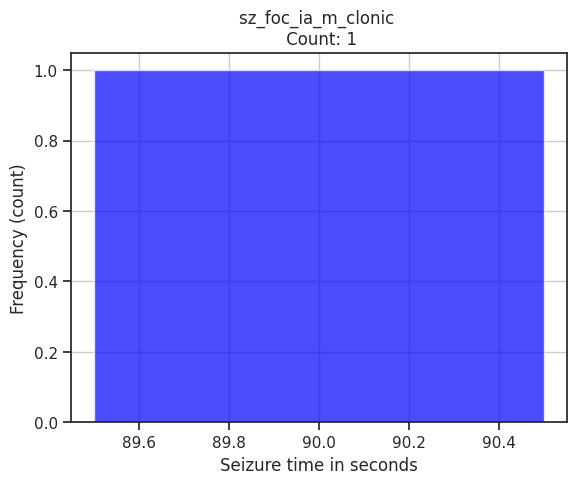

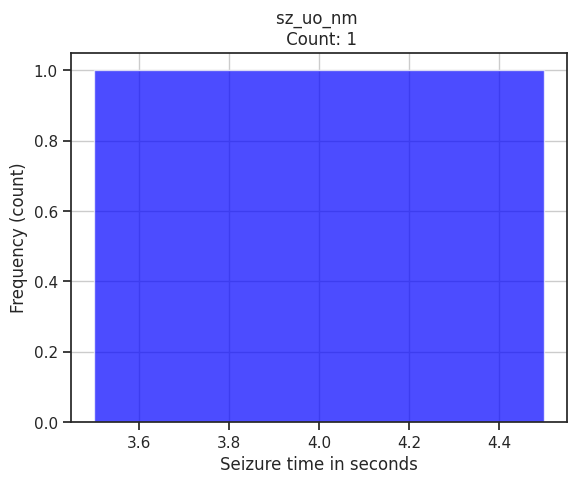

In [62]:
for seizure_type, durations in seizure_dict.items():
    plot_frequency_distribution(durations, f"{seizure_type} \n Count: {len(durations)}")